# Getting Started

# Divorce Prediction
## Group 46
#### Dias B.R.S.T - EG/2020/3893
#### Dissanayake D.K.R.C.K - EG/2020/3910

In [33]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn to 'darkgrid' for better visualization aesthetics
sns.set_style('darkgrid')

# Import the train_test_split function from scikit-learn for data splitting
from sklearn.model_selection import train_test_split

# Import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Import the PCA (Principal Component Analysis) module from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA

# import for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline  # Import the Pipeline class

In [34]:
# Read the CSV file 'divorce_data.csv' into a Pandas DataFrame
# Specify the delimiter as ';' since it's a CSV file with semicolon as the separator
data = pd.read_csv('divorce_data.csv', delimiter=';')
# The variable 'data' now holds the contents of the CSV file in a DataFrame
# You can use this DataFrame for further analysis, exploration, and machine learning tasks

In [35]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


# Preprocessing for data

In [36]:
# prompt:

X = data.drop('Divorce', axis=1)
y = data['Divorce']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Preprocessing for numerical data (handling missing values and scaling)
numerical_features = X.select_dtypes(include=[np.number]).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [38]:
X.isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
Q27    0
Q28    0
Q29    0
Q30    0
Q31    0
Q32    0
Q33    0
Q34    0
Q35    0
Q36    0
Q37    0
Q38    0
Q39    0
Q40    0
Q41    0
Q42    0
Q43    0
Q44    0
Q45    0
Q46    0
Q47    0
Q48    0
Q49    0
Q50    0
Q51    0
Q52    0
Q53    0
Q54    0
dtype: int64

In [39]:
# Preprocessing for categorical data (encoding)
categorical_features = X.select_dtypes(include=[np.object]).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

<ipython-input-39-8ab601c4657a>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X.select_dtypes(include=[np.object]).columns


In [40]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [41]:
X.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54'],
      dtype='object')

# Training a Model

In [42]:
# Extract the target variable 'Divorce' from the DataFrame and create a copy
y = data['Divorce'].copy()

# Extract the features (independent variables) by dropping the 'Divorce' column from the DataFrame and create a copy
X = data.drop('Divorce', axis=1).copy()

# Split the data into training and testing sets
# X_train: Features for training, X_test: Features for testing
# y_train: Target variable for training, y_test: Target variable for testing
# train_size=0.7: 70% of the data is used for training, shuffle=True: Randomly shuffle the data, random_state=1: Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
# The variables X_train, X_test, y_train, and y_test now hold the respective portions of the dataset

In [43]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [44]:
y_train

12     1
150    0
149    0
28     1
156    0
      ..
133    0
137    0
72     1
140    0
37     1
Name: Divorce, Length: 118, dtype: int64

In [45]:
# Create an instance of the LogisticRegression model
model = LogisticRegression()

# Train the logistic regression model using the training data
model.fit(X_train, y_train)

# Print the test accuracy of the trained model
# The model's accuracy is evaluated on the test set (unseen data)
# model.score(X_test, y_test) returns the accuracy, which is then multiplied by 100 for percentage representation
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 96.15%


# Using PCA for Dimensionality Reduction

In [46]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [47]:
# Set the number of components for PCA
n_components = 10

# Create a PCA object with the specified number of component
pca = PCA(n_components=n_components)

# Fit the PCA model to the training data
pca.fit(X_train)

# Transform the original features into the reduced feature space using PCA
# Create new DataFrames for the reduced features for both training and test sets
X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [48]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
12,14.066466,-0.065186,-0.810092,1.391413,0.603331,-1.032619,-1.856151,-0.928209,-0.119226,-1.371791
150,-8.582718,-3.543475,-2.860693,-0.718076,0.227951,-0.035169,-2.338792,-1.715401,1.697381,0.379319
149,-8.548589,-4.145983,-4.055091,-2.128593,2.438771,0.097365,-0.728773,1.263579,1.254430,-0.350033
28,12.748873,-1.135939,-0.047615,1.160251,0.003013,-1.158083,-2.667211,0.338645,-0.025645,1.251005
156,-7.870086,1.805395,0.221772,-1.231504,0.141632,-1.062326,-0.063183,-1.393429,0.010069,-0.962790
...,...,...,...,...,...,...,...,...,...,...
133,-8.495490,0.508305,0.541573,1.314817,1.032915,-1.834335,0.609724,0.437751,-0.027999,0.102420
137,-8.845278,-2.717350,0.367302,1.781332,-0.159814,1.269320,-1.127132,-1.365665,1.091692,-0.039301
72,9.032262,1.283010,-1.104992,1.114686,0.073987,-0.099858,0.305795,-0.213731,0.215465,-0.344653
140,-8.453574,-0.518549,0.465545,1.019478,-1.699143,-0.461717,-1.131805,-0.269720,-0.752292,0.339372


<ipython-input-49-1ced8aac2142>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


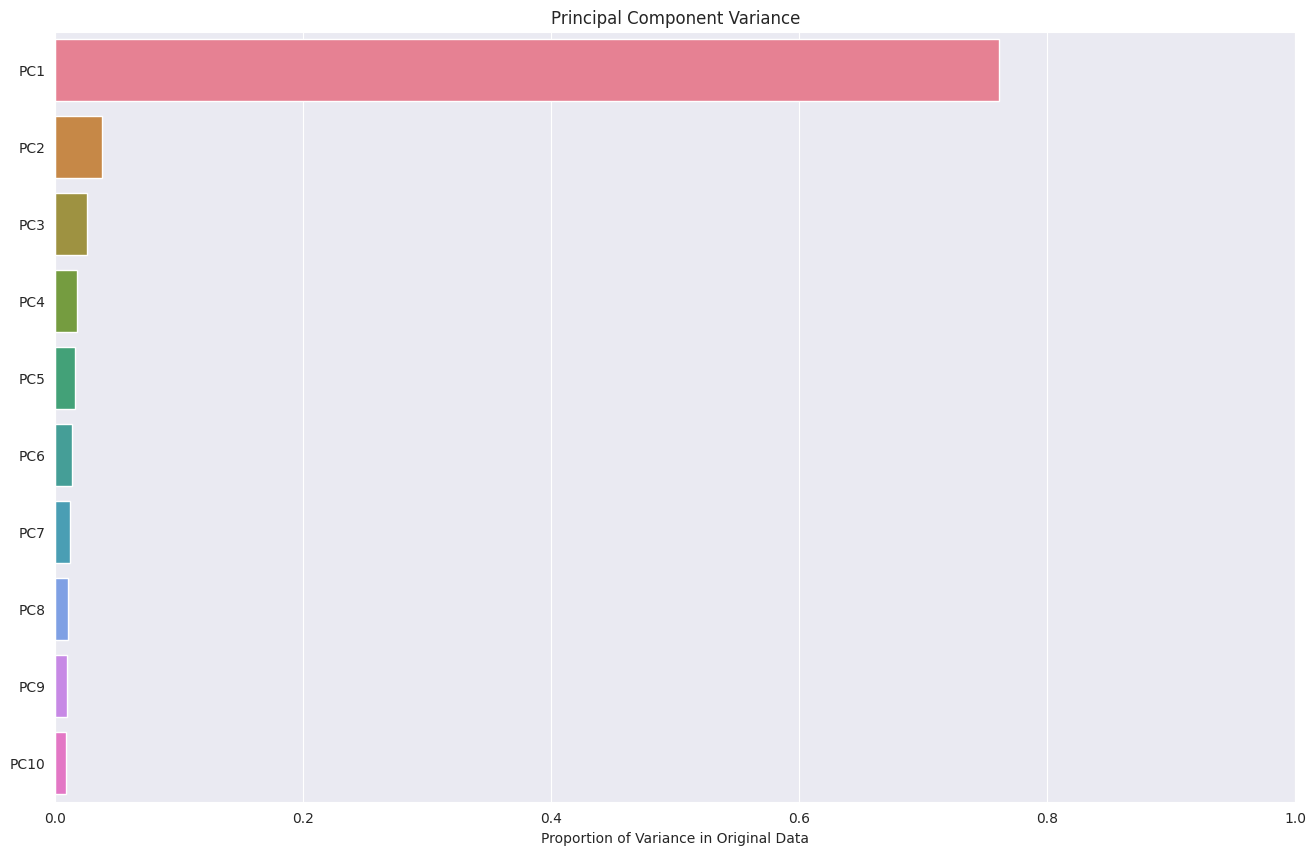

In [49]:
# Set the figure size for better visualization
plt.figure(figsize=(16, 10))
# Create a horizontal bar plot to show the proportion of variance explained by each principal component
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')

# Set the x-axis limit to show proportions between 0 and 1
plt.xlim(0., 1.)

# Set labels and title for better interpretation
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")

# Display the plot
plt.show()

In [50]:
# Create a logistic regression model for the reduced feature space
reduced_model = LogisticRegression()

# Train the logistic regression model using the reduced training data
reduced_model.fit(X_train_reduced, y_train)

# Print the test accuracy of the model on the reduced feature space
# The accuracy is evaluated on the test set transformed using the same PCA
print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (10 Components): 96.15%


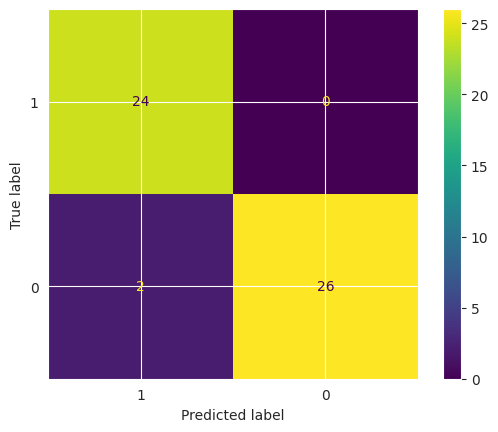

In [51]:
ConfusionMatrixDisplay.from_estimator(
    reduced_model, X_test_reduced, y_test,
    display_labels=["1", "0"])
plt.show()

In [52]:
# Dimensionality reduction using PCA
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

<ipython-input-53-1ced8aac2142>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


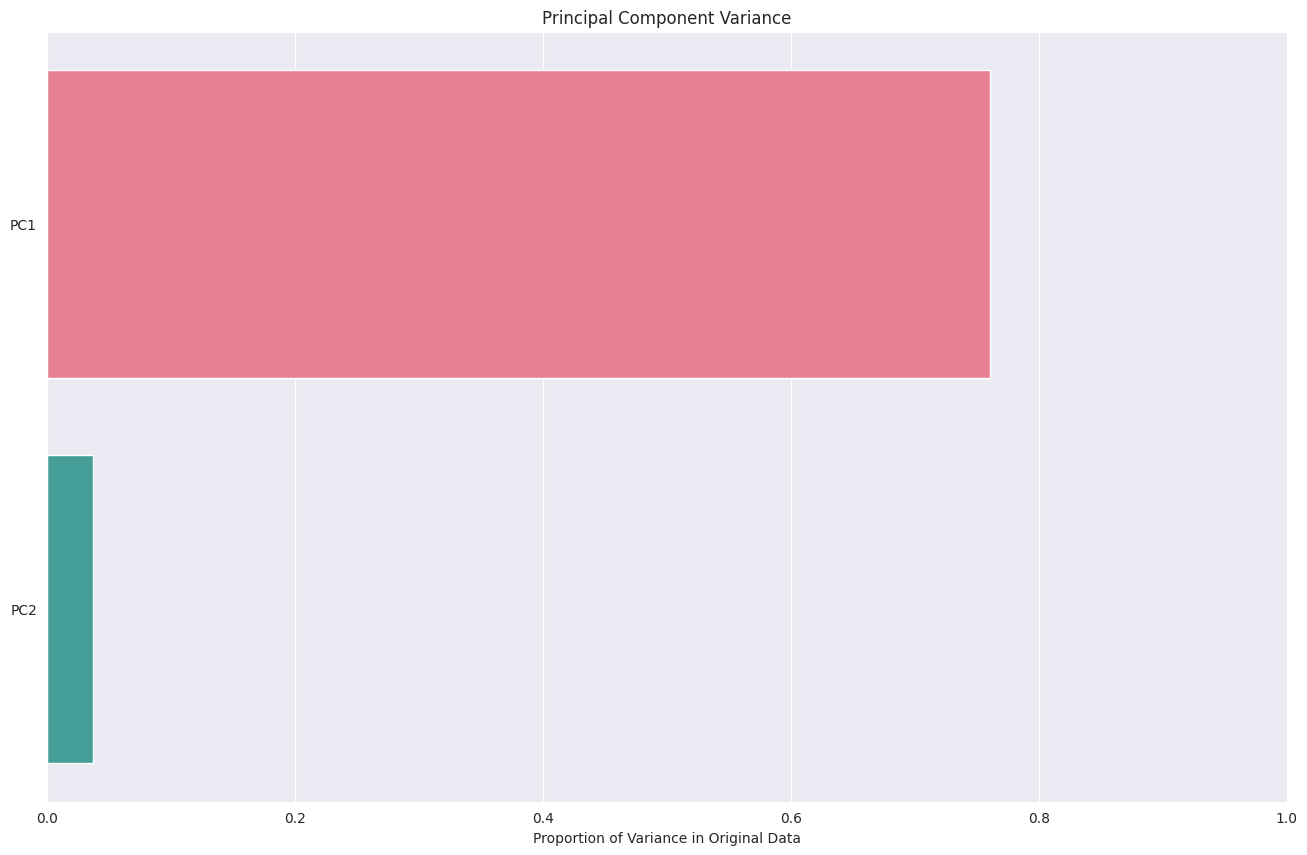

In [53]:
# Set the figure size for better visualization
plt.figure(figsize=(16, 10))
# Create a horizontal bar plot to show the proportion of variance explained by each principal component
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')

# Set the x-axis limit to show proportions between 0 and 1
plt.xlim(0., 1.)

# Set labels and title for better interpretation
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")

# Display the plot
plt.show()

# Using PCA for Visualization

In [54]:
# Dimensionality reduction using PCA
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [55]:
X_train_reduced

,PC1,PC2
12,14.066466,-0.065186
150,-8.582718,-3.543475
149,-8.548589,-4.145983
28,12.748873,-1.135939
156,-7.870086,1.805395
...,...,...
133,-8.495490,0.508305
137,-8.845278,-2.717350
72,9.032262,1.283010
140,-8.453574,-0.518549


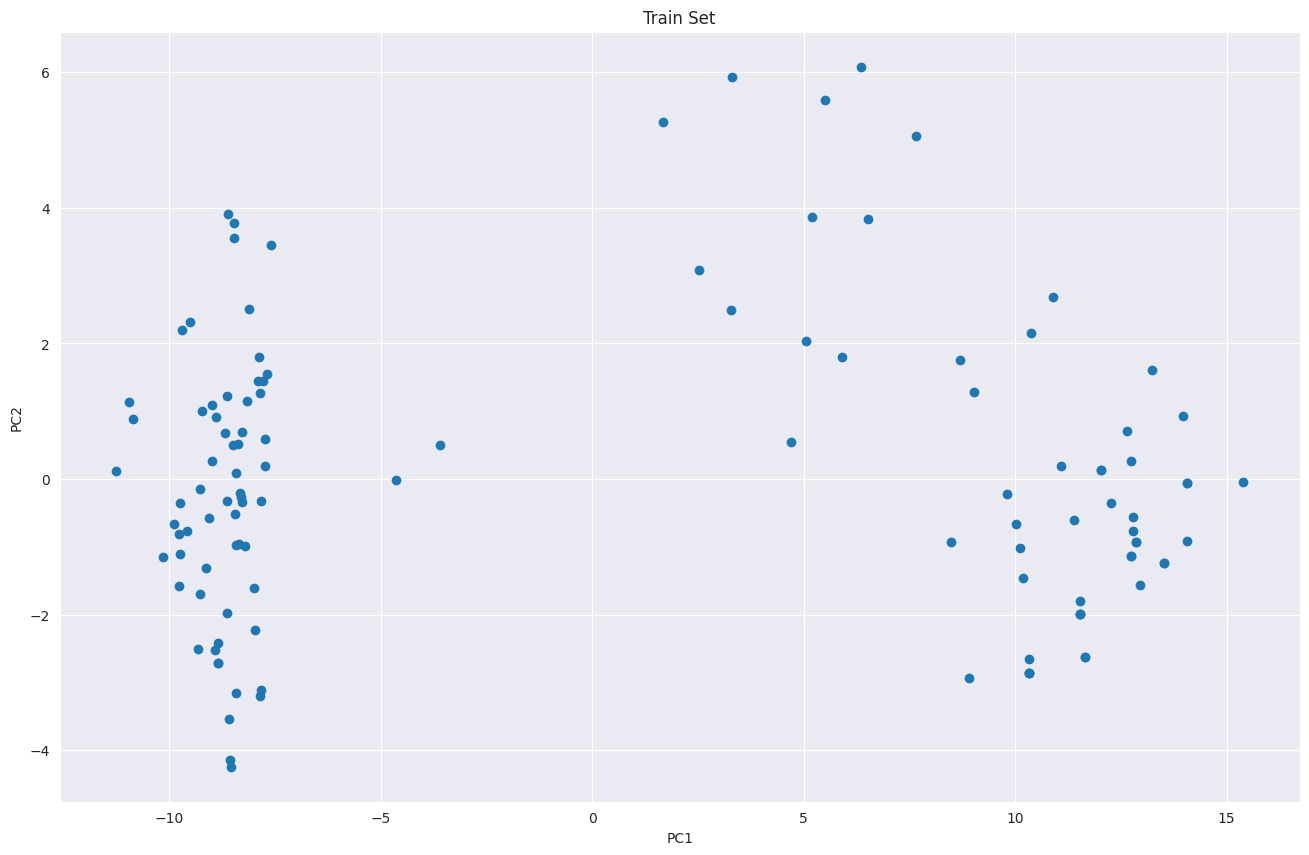

In [56]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced['PC1'], X_train_reduced['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.show()

In [57]:
X_train_reduced.loc[y_train == 0, 'PC2']

150   -3.543475
149   -4.145983
156    1.805395
130    0.084000
110   -0.580768
         ...   
129   -2.419276
144    0.700210
133    0.508305
137   -2.717350
140   -0.518549
Name: PC2, Length: 62, dtype: float64

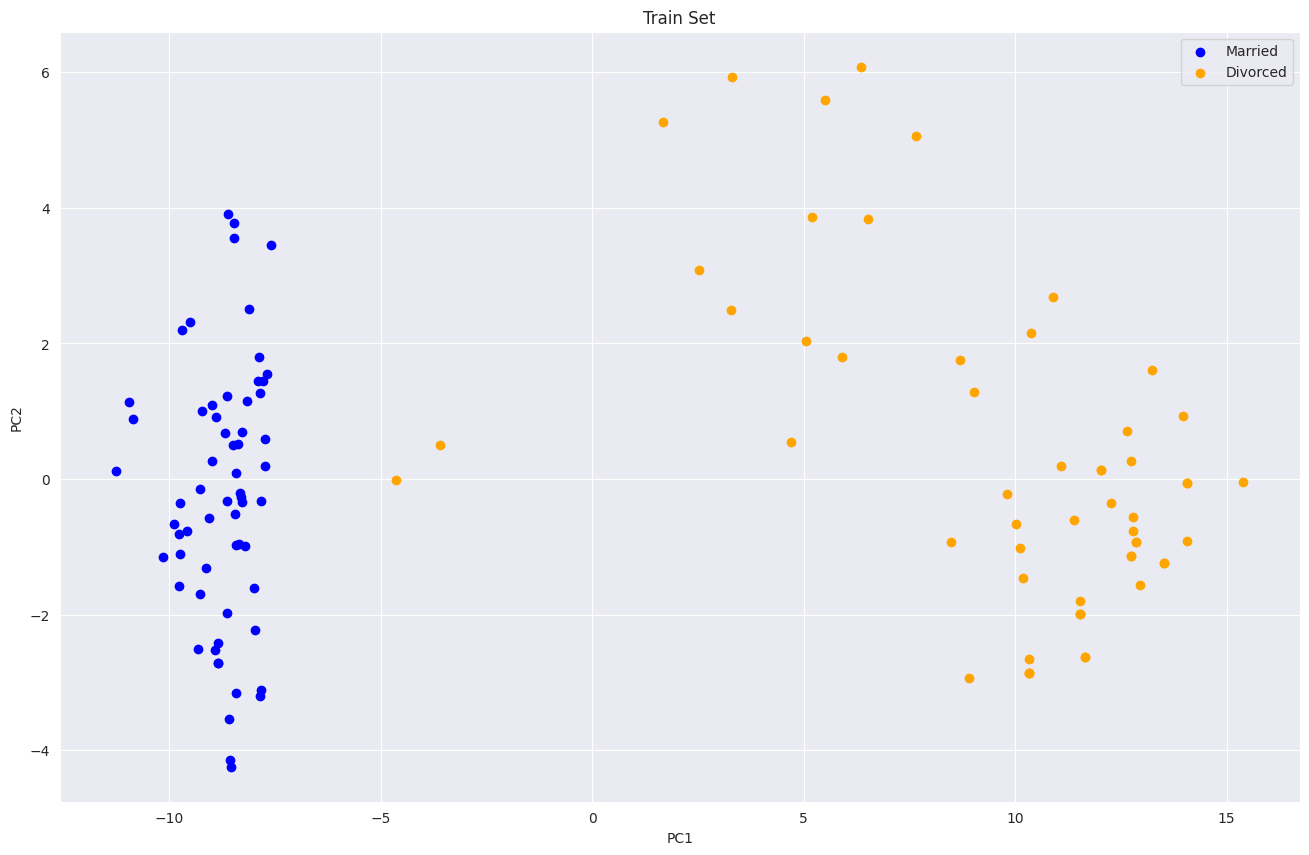

In [58]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced.loc[y_train == 0, 'PC1'], X_train_reduced.loc[y_train == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_train_reduced.loc[y_train == 1, 'PC1'], X_train_reduced.loc[y_train == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.legend()
plt.show()

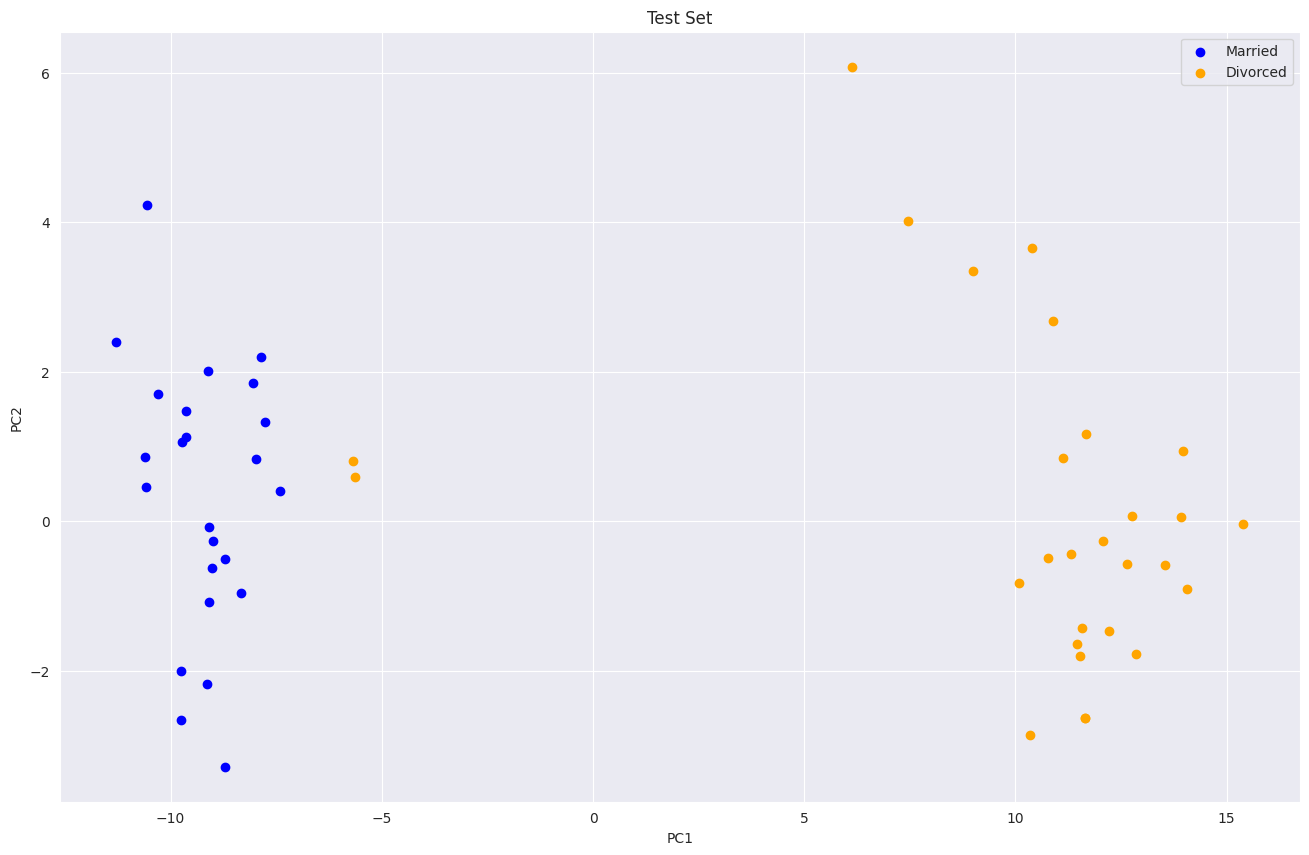

In [59]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Test Set")
plt.legend()
plt.show()

# Logistic Regression

In [60]:
# Create a logistic regression model for the reduced feature space
reduced_model = LogisticRegression()

# Train the logistic regression model using the reduced training data
reduced_model.fit(X_train_reduced, y_train)

# Print the test accuracy of the model on the reduced feature space
# The accuracy is evaluated on the test set transformed using the same PCA
print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (2 Components): 96.15%


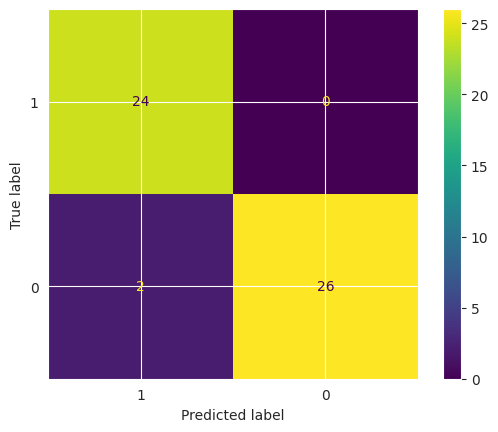

In [61]:
ConfusionMatrixDisplay.from_estimator(
    reduced_model, X_test_reduced, y_test,
    display_labels=["1", "0"])
plt.show()

# Decision Tree

In [62]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=1)

In [63]:
# Evaluate the accuracy
from sklearn.metrics import accuracy_score

# Assuming you have your test data as X_test_reduced and corresponding labels as y_test
y_pred = decision_tree_model.predict(X_test_reduced)

# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, decision_tree_model.score(X_test_reduced, y_test) * 100))


Test Accuracy (2 Components): 100.00%


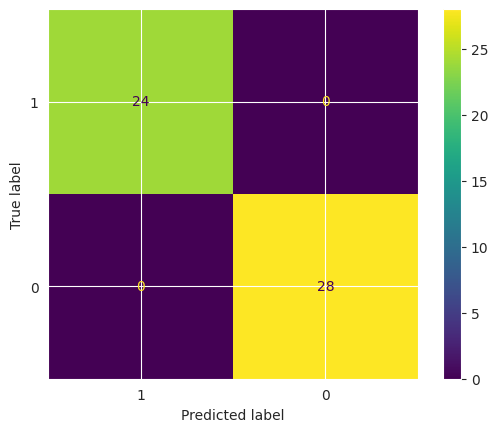

In [64]:
ConfusionMatrixDisplay.from_estimator(
    decision_tree_model, X_test_reduced, y_test,
    display_labels=["1", "0"])
plt.show()

# K Neighbours Algorithm

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=2)

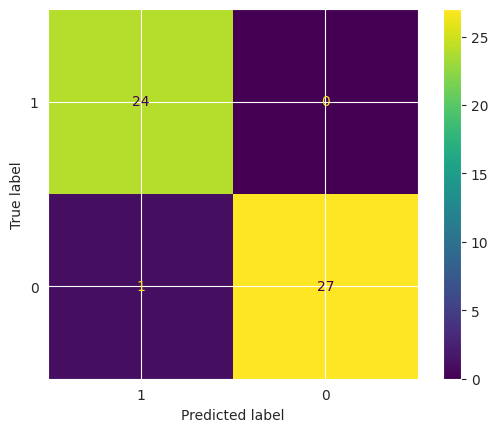

In [66]:
ConfusionMatrixDisplay.from_estimator(
    knn_model, X_test_reduced, y_test,
    display_labels=["1", "0"])
plt.show()

In [67]:
print("Test Accuracy ({} Components): {:.2f}%".format(n_components, knn_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (2 Components): 98.08%
